# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
import pprint

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")



### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Save config information.
## TEST TO CHECK THAT API CONNECTION IS RUNING

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
test_city = "Auckland"
units = "metric"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get temperature from JSON response
temperature = weather_json["main"]["temp"]

# Report temperature
print(f"The temperature in Bujumbura is {temperature} C.")

The temperature in Bujumbura is 19.5 C.


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bocaranga
City not found. Skipping...
Processing Record 2 of Set 1 | jiexiu
Processing Record 3 of Set 1 | marcona
City not found. Skipping...
Processing Record 4 of Set 1 | skibbereen
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | teahupoo
Processing Record 8 of Set 1 | neftcala
Processing Record 9 of Set 1 | new philadelphia
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | tongren
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | san andres
Processing Record 15 of Set 1 | latung
Processing Record 16 of Set 1 | simi
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | champerico
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | atuona
Processing Record 22 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df["Date"]=(pd.to_datetime(city_data_df["Date"],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jiexiu,37.0244,111.9125,294.99,97,100,2.38,CN,2023-07-30
1,skibbereen,51.5500,-9.2667,288.77,92,97,8.98,IE,2023-07-30
2,rikitea,-23.1203,-134.9692,293.85,65,87,11.39,PF,2023-07-30
3,cherskiy,68.7500,161.3000,278.26,97,100,0.99,RU,2023-07-30
4,teahupoo,-17.8333,-149.2667,294.13,79,96,8.24,PF,2023-07-30


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [10]:
## Set nominal time  as per charts requirements
my_time = '2022-10-08'

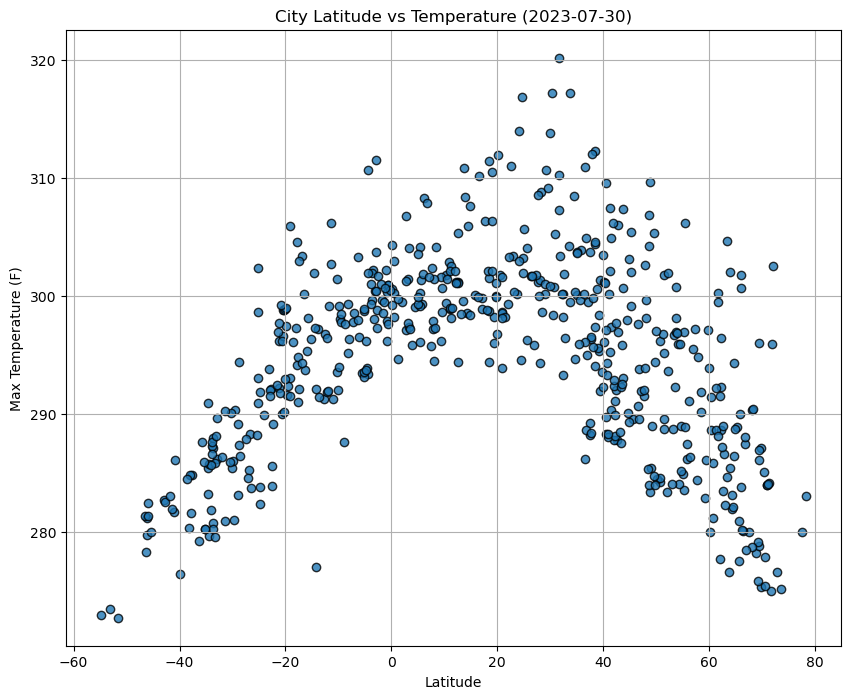

In [11]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
date=city_data_df["Date"].min()


# labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Temperature ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

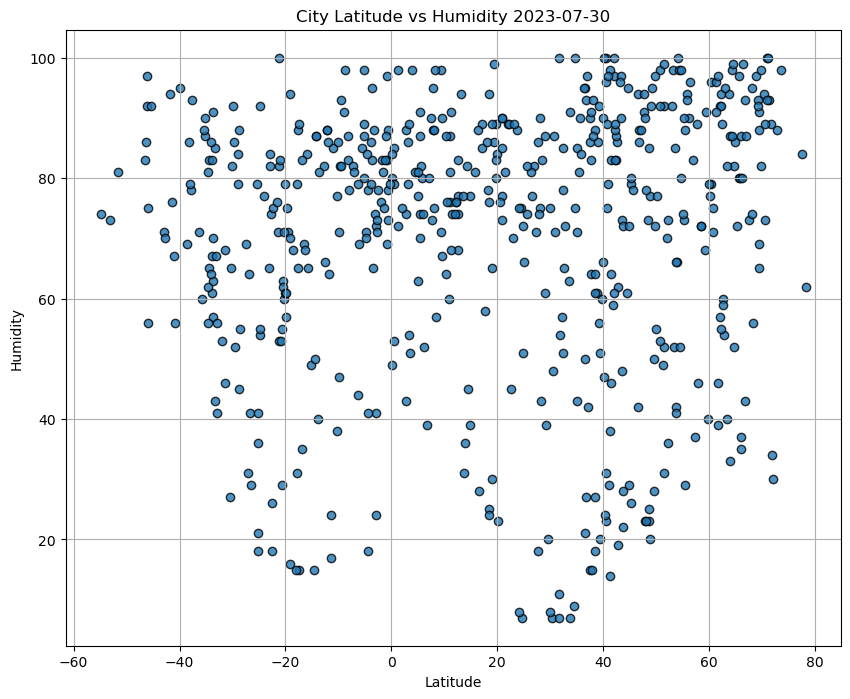

In [12]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
date=city_data_df["Date"].min()

# labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs Humidity {date}')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

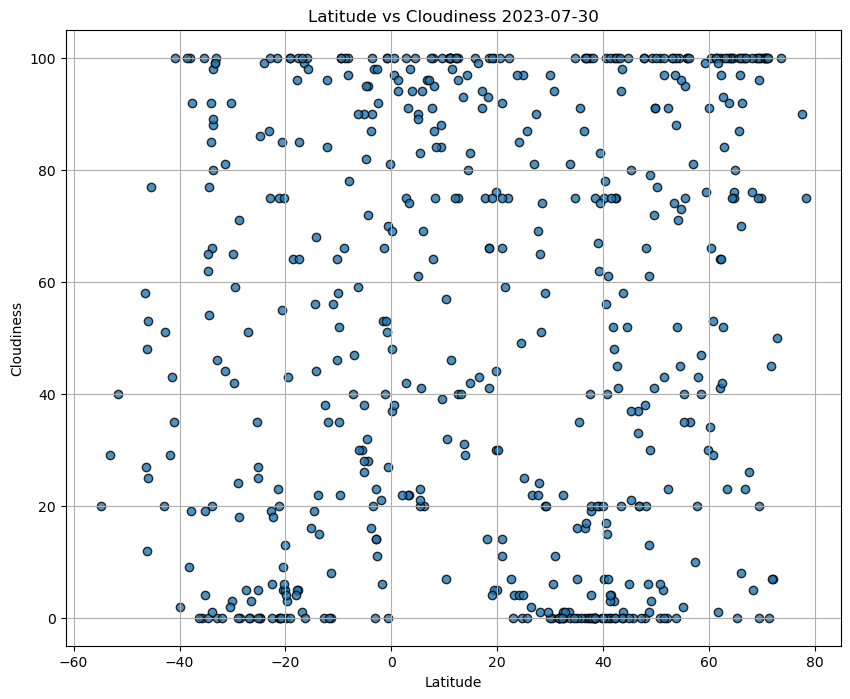

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)

date=city_data_df["Date"].min()

# labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness {date}')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

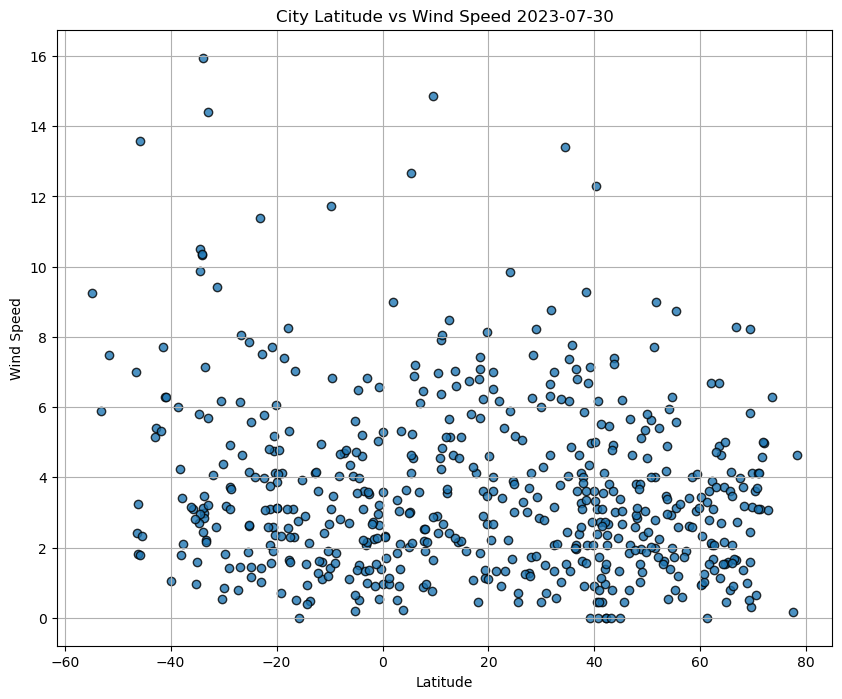

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
date=city_data_df["Date"].min()

# labels 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed {date}')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# def LineRegressionPlots


#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

#equation of a line, y = mx + c
#line = f"y = (round(slope,2))x + (round(intercept,2))"

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jiexiu,37.0244,111.9125,294.99,97,100,2.38,CN,2023-07-30
1,skibbereen,51.5500,-9.2667,288.77,92,97,8.98,IE,2023-07-30
3,cherskiy,68.7500,161.3000,278.26,97,100,0.99,RU,2023-07-30
5,neftcala,39.3742,49.2472,301.38,51,83,4.98,AZ,2023-07-30
6,new philadelphia,40.4898,-81.4457,289.74,96,17,0.45,US,2023-07-30


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,293.85,65,87,11.39,PF,2023-07-30
4,teahupoo,-17.8333,-149.2667,294.13,79,96,8.24,PF,2023-07-30
10,mataura,-46.1927,168.8643,281.19,97,12,1.81,NZ,2023-07-30
14,busselton,-33.6500,115.3333,287.96,70,98,2.98,AU,2023-07-30
15,punta arenas,-53.1500,-70.9167,273.51,73,29,5.90,CL,2023-07-30


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6236527438961266


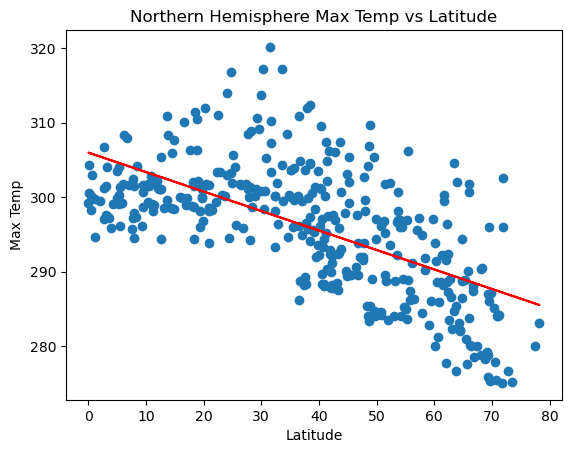

In [32]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Northern Hemisphere Max Temp vs Latitude')
plt.annotate(line,(0,15),fontsize=12,color="red")
print(f'The r-value is {rvalue}')

# Save the figure
plt.savefig("output_data/nh_MaxTemp.png")

The r-value is 0.8278713865319559


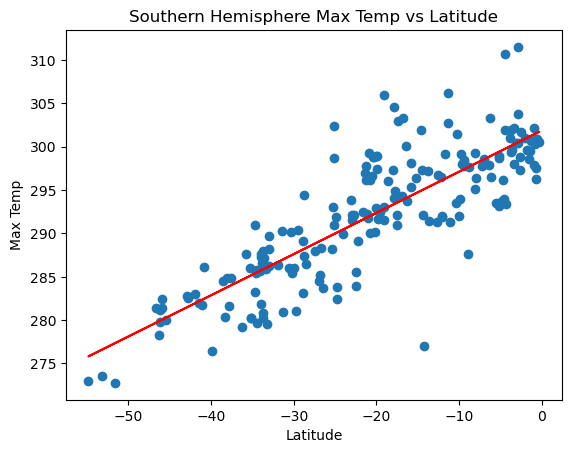

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Southern Hemisphere Max Temp vs Latitude')
plt.annotate(line,(0,15),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.savefig("output_data/sh_MaxTemp.png")

**Discussion about the linear relationship:**
In the Northern Hemisphere there is a negative relation ship between the latitude and the Maximum Temp.  
We see the inverse in the southern hemisphere with a positive relationship between the latitude and the Maximum Temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.04557981221623379


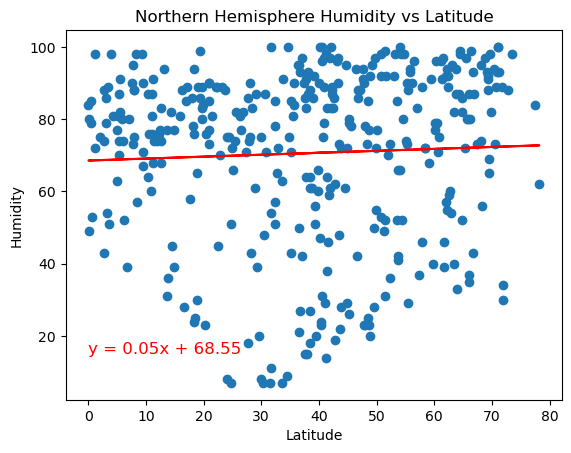

In [33]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.title('Northern Hemisphere Humidity vs Latitude')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line,(0,15),fontsize=12,color="red")
print(f'The r-value is {rvalue}')

plt.savefig("output_data/nh_hum.png")

The r-value is 0.01960220314047251


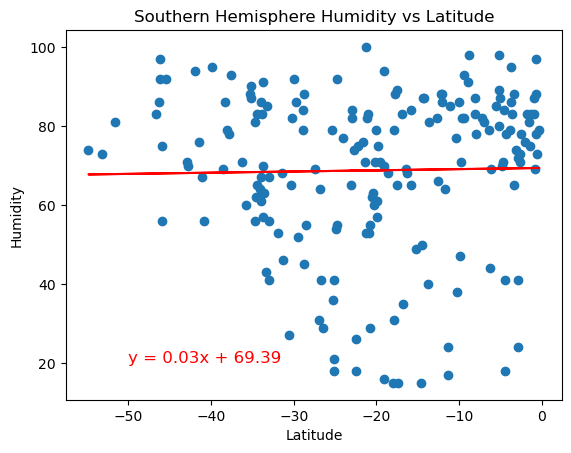

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Southern Hemisphere Humidity vs Latitude')
plt.annotate(line,(-50, 20),fontsize=12,color="red")
print(f'The r-value is {rvalue}')

plt.savefig("output_data/sh_hum.png")

**Discussion about the linear relationship:**
There is an invers linear relationship between the Latitude and the Humidity in the north andd sourthern hemispher.  
here is a slight positive relationship betwen Humidity and lattitude in the northern hemispher. As the value of the latitude increases by 1, Humidity will increase by 0.06.   
There is a slight negative relationship between Humditty and latitude in the southern hemisphere. As the value of the latidue increases by 1, Humidity will decrease by 0.07. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.018615615311873442


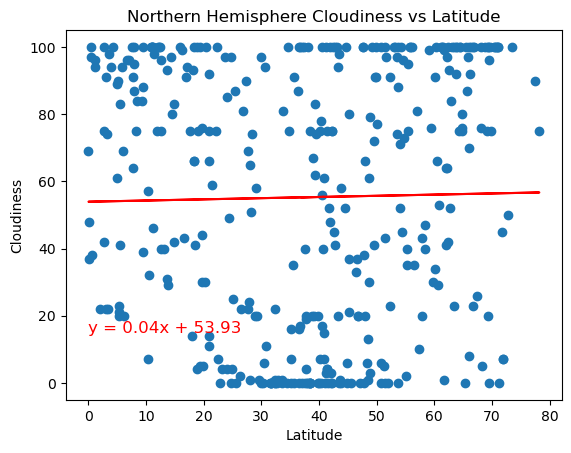

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Northern Hemisphere Cloudiness vs Latitude')
plt.annotate(line,(0,15),fontsize=12,color="red")
print(f'The r-value is {rvalue}')

plt.savefig("output_data/nh_clo.png")

The r-value is 0.10321144332979648


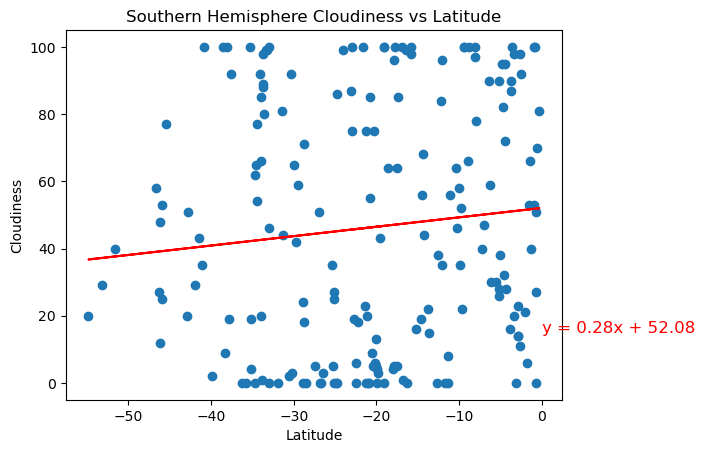

In [38]:
# Southern Hemisphere
# Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.title('Southern Hemisphere Cloudiness vs Latitude')
plt.ylabel("Cloudiness")
plt.annotate(line,(0,15),fontsize=12,color="red")
print(f'The r-value is {rvalue}')

plt.savefig("output_data/sh_clo.png")

**Discussion about the linear relationship:** 
In the northern hemisphere there is a very slight negative relationship between Latitude and couldiness- almost at 0.
In the southern hemisphere thers is a slight positive relationship between latitude and couldeness an increase of 0.24 per increase in Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.14232164810074624


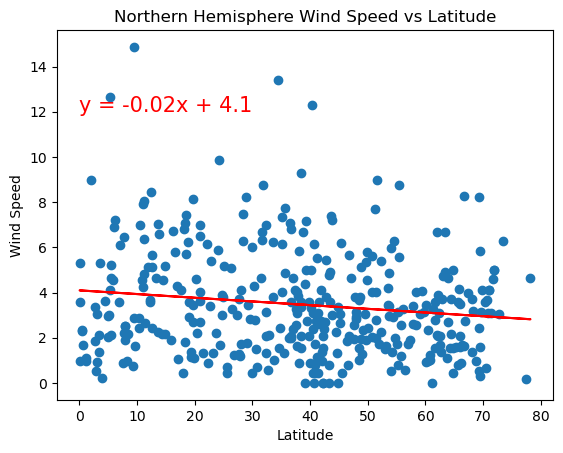

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Northern Hemisphere Wind Speed vs Latitude')
plt.annotate(line,(0,12),fontsize=15,color="red")
print(f'The r-value is {rvalue}')

plt.savefig("output_data/nh_wind.png")

The r-value is -0.29940980590714633


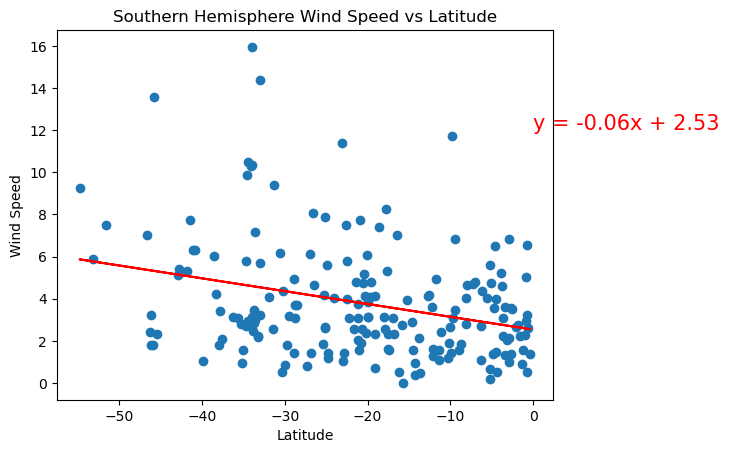

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Southern Hemisphere Wind Speed vs Latitude')
plt.annotate(line,(0,12),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.savefig("output_data/sh_wind.png")

**Discussion about the linear relationship:**  There is a similar negative relationship of Wind Speed and Latitude in both the northern and southern hemisphere. 
The slope of the relationship in the southern hemisphere is slightely steeper -0.06 than the northern hemisphiere 0.01